# Removing noise with FFT

This notebook contains my attempt at replicating the results shown in [this](https://www.youtube.com/watch?v=b06pFMIRO0I) video. The purpose of this is to help me learn how to use fourier transforms effectively.

## Generate data

There are 200 samples


<AxesSubplot:>

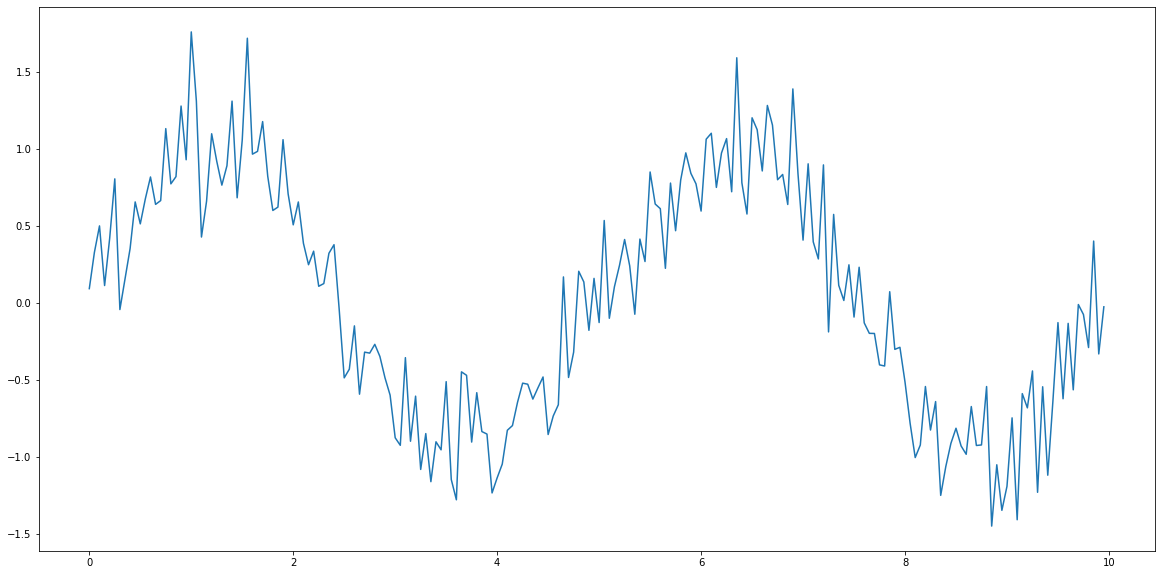

In [33]:
import pandas as pd
import numpy as np
from scipy import fftpack

time_step = 0.05
time_vector = np.arange(0, 10, time_step)
period = 5

signal = pd.Series(
    index=time_vector,
    data=(
        np.sin(2 * np.pi * time_vector / period)
        + 0.25 * np.random.randn(time_vector.size)
    )
).rename("signal")
print("There are {} samples".format(signal.shape[0]))
signal.plot(figsize=(20, 10))

## Run FFT analysis

There are 200 values in the frequency series


<AxesSubplot:>

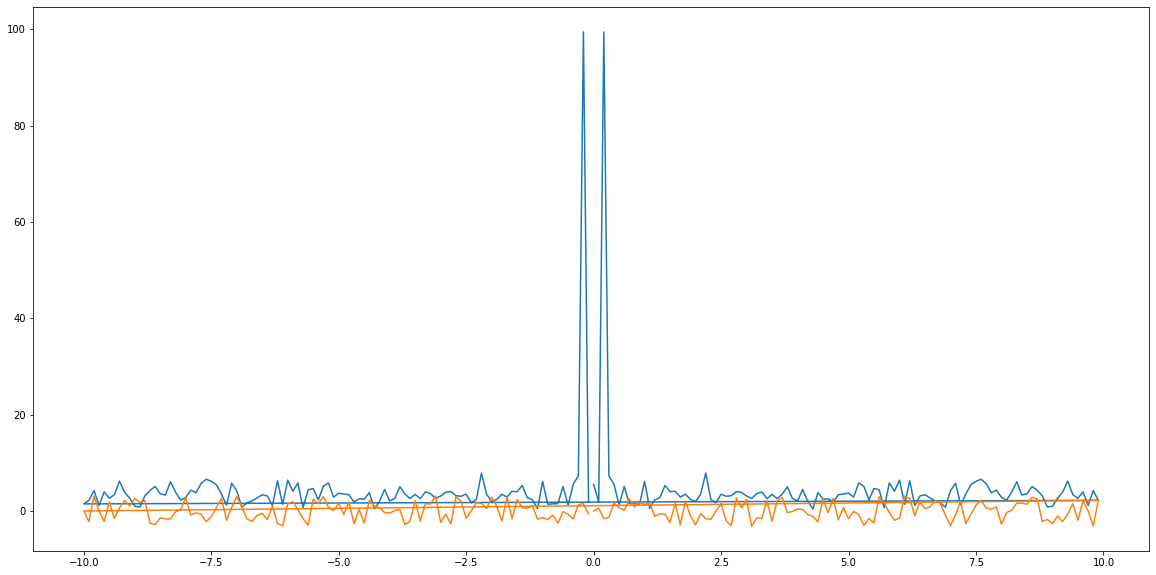

In [35]:
sig_fft = fftpack.fft(signal.values)
amplitude = np.abs(sig_fft)
# Phase spectrum
angle = np.angle(sig_fft)

sample_frequency = fftpack.fftfreq(signal.size, time_step)

freq_space_series = pd.Series(
    index=sample_frequency,
    data=sig_fft
).rename("fft")
print("There are {} values in the frequency series".format(freq_space_series.shape[0]))

amplitude_series = freq_space_series.abs()
angle_series = pd.Series(
    index=sample_frequency,
    data=np.angle(freq_space_series.values)
)

amplitude_series.plot(figsize=(20, 10))
angle_series.plot(figsize=(20, 10))


## Find peak frequency

Peak frequency (0.2) has an amplitude of 101.41097248856228


<AxesSubplot:>

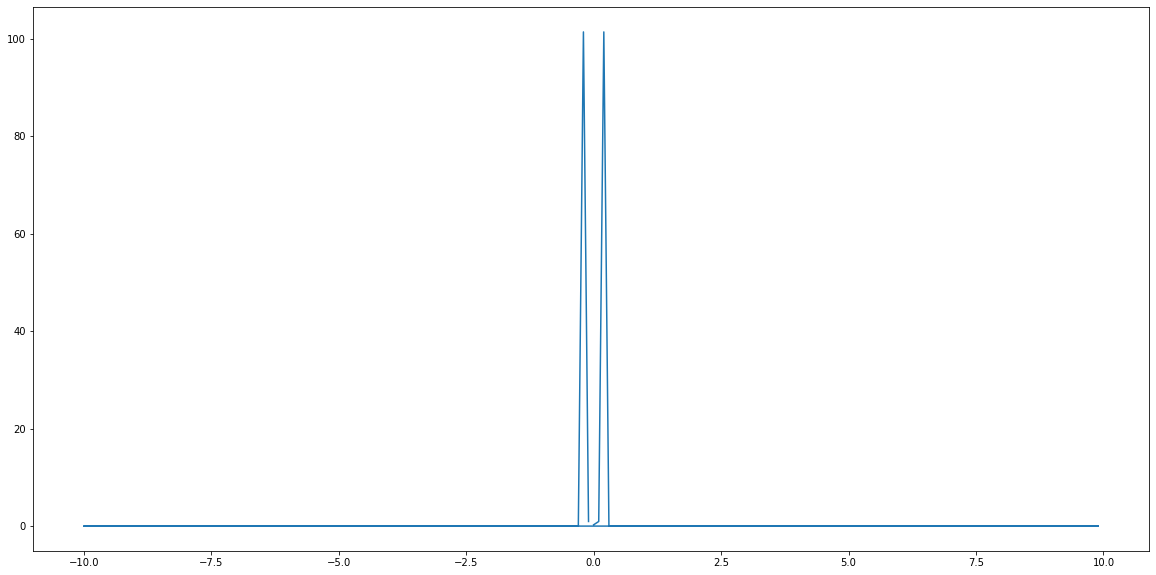

In [29]:
peak_freq = amplitude_series.idxmax()
print("Peak frequency ({}) has an amplitude of {}".format(peak_freq, amplitude_series.loc[peak_freq]))

filtered_fft = amplitude_series.copy().rename("filtered_fft")
filtered_fft.loc[np.abs(amplitude_series.index) > peak_freq] = 0

filtered_fft.plot(figsize=(20, 10))

## Build the smoothed time domain

Use the inverse fourier transform to build a smoothed version of the input data

There are 200 samples in the filtered signal


<AxesSubplot:>

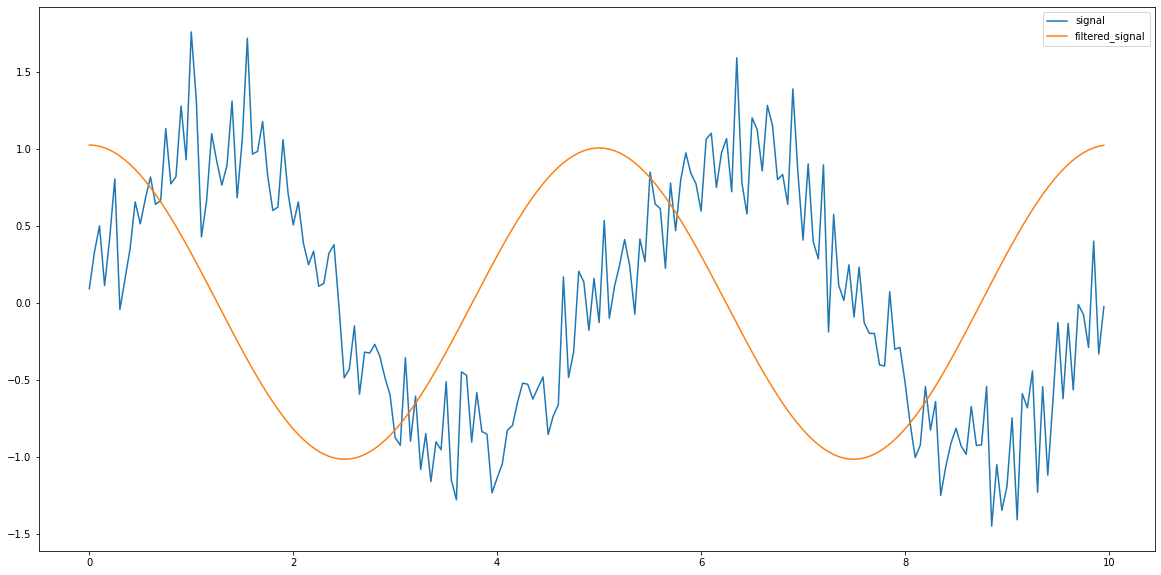

In [36]:
filtered_sig = pd.Series(
    index=time_vector,
    data=np.real(fftpack.ifft(filtered_fft.values))
).rename("filtered_signal")
print("There are {} samples in the filtered signal".format(filtered_sig.shape[0]))

comparison_df = pd.concat([signal, filtered_sig], axis=1)
comparison_df.plot(figsize=(20, 10))